# __Part 1  - Tensor Introduction__

- __Tensor = a vector of a '_$n$_' number  of dimensions (i.e. n-dimensional arrays)__ that represent all types of data which are represented in shapes.

- __Vector = list of number values__


- __Shapes = The dimension of the data being represented.__ (e.g. 2 rows 2 Columns)



#### __Graphs and Sessions__

- __Graph__ - Set of computations that take place one after the other
Session 

- __Session__ - The components from the graph 


#### __Types of Tensors__

- __Variable__ - variables in Tensorflow can't be changed. (Immutable)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf 
#Here I created a tensor of 0's with the shape of 5 sets of 5 arrays with 5 row & 5 col
t = tf.zeros([5,5,5,5])   # 5x5 array, 5 rows, 5 col
print(t)
#Reshapes the tensor with 625 elements (elements are the number 0 in this case)
t = tf.reshape(t, [625])   # 625 col (1 array, 1 row)
print(t)
#Reshapes the tensor with 125 rows (using -1 will create the amount of columns needed to complete the task)
t = tf.reshape(t, [125, -1]) # 125 row (5 array, 1 col)
print(t)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

***

# __Part 2  - Core Learning Algorithms__


In this content, there are 3 supervised learning and 2 unsupervised learning methods. These are following:

####__2.1) Linear Regression__ 

####__2.2) Linear Classification & Deep Neural Network (DNN) Classification__

####__2.3) K-means Clustering__

####__2.4) Hidden Markov Model__

##__1) Linear Regression__

__Linear Regression__ - When data points are related linearly, we can use the given points to create a line of best fit and predict future values.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from IPython.display import clear_output 
from six.moves import urllib
import sklearn

import tensorflow.compat.v2.feature_column as fc 
import tensorflow as tf 

Using the Titanic data set from Kaggle to predict the survival of passengers on the Titanic

Steps to take when building a model

1. Load the data
2. Explore the data
3. Catagorize the data
4. Create feature columns for the data

In [ ]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
print(dftrain.head())
y_train = dftrain.pop('survived') #pop removes a column of information and saves it for later under the given variable name
y_eval = dfeval.pop('survived')
print(dftrain.head())

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0     

In [ ]:
#Explore the data
dftrain.describe() #Gives overall information on data set

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape

(627, 9)

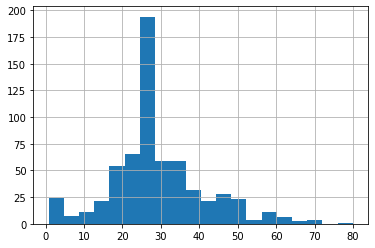

In [ ]:
dftrain.age.hist(bins=20) #bins-increments of graphing

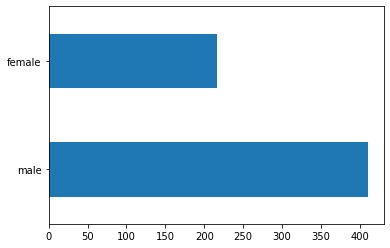

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

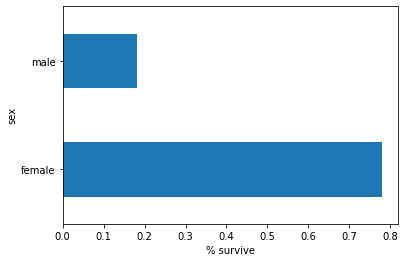

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')


- Most passengers are in their 20's or 30's
- Most passengers are male
- Most passengers are in "Third" class
- Females have a much higher chance of survival



---



#### __Training data and Testing data__


- __Training data__ = the data we feed to the model so that it can develop and learn.

- __Testing data__ = the data  we use to evaulate the model and see how well it is performing.



#### __Categorical data and Numerical data__

- __Categorical data__ - non-numerical data that can be placed under a specified field

  - Note: Categorical data can be represented by numbers to identify the categories they belong to. (ex: Male = 1, Female = 0)

- __Numerical data__ - data that's represented by numbers

In [ ]:
# Categorize data
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

In [ ]:
dftrain['class'].unique() #.unique() gives all of the unique values withing the dataset (the names of the different data elements)

array(['Third', 'First', 'Second'], dtype=object)

In [ ]:
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  #Create a column of feature names with the different associated vocabulary terms
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

###__Training process__

- Models must be fed the data in batches

- Batches are fed according to Epochs
  - __Epochs - The number of epochs we define is the amount of times our model will see the entire dataset.__ Feeding the data to the model in variations Note: Over feeding the model can harm the outcome so feed it a little at a time.

  - Ex. if we have 10 epochs, our model will see the same dataset 10 times.

### __Input Function for Linear Regression__


The TensorFlow model we are going to use requires that the data we pass it comes in as a `tf.data.Dataset` object. This means we must create a __input function__ that can __convert our current pandas dataframe into that object__.

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


## __Creating the Linear Regression Model__

Here we will use a linear estimator utilize the linear regression algorithm.

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier through an estimator module

linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing data

clear_output()  # clears console output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model that tells the accuracy of it
#Accuracy - compares the dataset results with models predicted results to get the accuracy of the data
print(result)

0.7462121
{'accuracy': 0.7462121, 'accuracy_baseline': 0.625, 'auc': 0.82981324, 'auc_precision_recall': 0.7970237, 'average_loss': 0.4780455, 'label/mean': 0.375, 'loss': 0.47027853, 'precision': 0.65686274, 'prediction/mean': 0.41438606, 'recall': 0.67676765, 'global_step': 200}


### __Predicting the data set with the model__

How to make predictions for every point in the evaluation data set

In [ ]:
#Check the predictions of the model
#Here we will turn the results into a list to get a dictionary of all points and predictions
result = list(linear_est.predict(eval_input_fn))
#print(result[0])
#Here are looking for the 'probabilities' dict because it will help us to see the probability that someone will survive or won't survive
#Look for this --> {'probabilities': array([0.9108078 (<--won't survive(0)) , 0.08919217 (<-- will survive(1))]}

#Here we will print the probability of survival (1)
print(result[0]['probabilities'][0]) #Format: [passenger/data point][data set dict][outcome (survival)]


0.90112936


To put this together we can evaluate the passengers' attributes to see if the prediction makes sense with the `dfeval.loc[ ]` method

In [ ]:
print(dfeval.loc[36])
print(y_eval.loc[36])
print(result[36]['probabilities'][1]) 
#This will give us the passengers details and their chance of survival and if they survived

sex                          male
age                          36.5
n_siblings_spouses              0
parch                           2
fare                         26.0
class                      Second
deck                            F
embark_town           Southampton
alone                           n
Name: 36, dtype: object
0
0.20476802




---



## __2) Classification__

- __Classification__ = Differentiating data points and separating them into classes. 

- Predicting the probability that the data point is in specified classes.

####__Dataset__

This specific dataset seperates flowers into 3 different classes of species.

- Setosa
- Versicolor
- Virginica

The information about each flower is the following.

- sepal length
- sepal width
- petal length
- petal width

In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

In [ ]:
#Call in the data set
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [ ]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
train_y = train.pop('Species') # Remove the species column
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


#### __Input function for Classification__

- Create a input function that can convert our current pandas dataframe into that object.

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:  # If training is True
        dataset = dataset.shuffle(1000).repeat() # Shuffle 1000 times 
    
    return dataset.batch(batch_size)
    

#### __Feature Column__

- __Feature Columns__ - describe how to use the input.

In [ ]:
# Feature columns describe how to use the input. We don't need the numerical of the previous input function because we're looking for the key values
my_feature_columns = []

for key in train.keys(): #this code will loop through all of the keys in the dataset
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


###__Building the Model__
And now we are ready to choose a model. For classification tasks there are variety of different estimators/models that we can pick from. Some options are listed below.
- ```DNNClassifier``` (Deep Neural Network)
- ```LinearClassifier```

We can choose either model but the DNN seems to be the best choice. 

__DNN Classifier (Deep Neural Network)__

In [ ]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

- What we've just done is created a deep neural network that has two hidden layers. 
- These layers have 30 and 10 neurons respectively. 
- The number of hidden neurons is an arbitrary number and many experiments and tests are usually done to determine the best choice for these values. 
- Try playing around with the number of hidden neurons and see if your results change.

In [ ]:
# 1) Training the DNN model
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)
# We include a lambda to avoid creating an inner function previously

In [ ]:
# 2) Evaluate the DNN model
eval_result = \
classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.867



__Predictions__ 

Now that we have a trained model it's time to use it to make predictions. This allows the features of a flower see a prediction for its class.



In [ ]:
# 3) Predict the Classification in DNN model
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
# Here is some example input and expected classes you can try above
predict = {
    'SepalLength': [5.1, 5.9, 6.9],  # for ['Setosa', 'Versicolor', 'Virginica']
    'SepalWidth' : [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth' : [0.5, 1.5, 2.1],
}
# predict = {}

# print("Please type numeric values as prompted.")
# for feature in features:
#   valid = True
#   while valid: 
#     val = input(feature + ": ")
#     if not val.isdigit(): valid = False

#   predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))

for pred_dict in predictions:
    print(pred_dict)
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))


{'logits': array([ 2.0228903 , -0.44664514, -0.92588234], dtype=float32), 'probabilities': array([0.8794857 , 0.07442575, 0.04608855], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is "Setosa" (87.9%)
{'logits': array([-0.8904028,  1.0031906,  1.0697792], dtype=float32), 'probabilities': array([0.06782504, 0.45057514, 0.48159978], dtype=float32), 'class_ids': array([2]), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is "Virginica" (48.2%)
{'logits': array([-1.6147898,  1.1993384,  1.7768766], dtype=float32), 'probabilities': array([0.02109969, 0.35191396, 0.6269864 ], dtype=float32), 'class_ids': array([2]), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2

In [ ]:
print(pred_dict)
		
#Probability percentage tells you how likely the data point is to be classified as the key value predictions.
#Class ID tells you what value the prediction is from the original list.

{'logits': array([-1.6147898,  1.1993384,  1.7768766], dtype=float32), 'probabilities': array([0.02109969, 0.35191396, 0.6269864 ], dtype=float32), 'class_ids': array([2]), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}




---



##3) __Clustering__

- __Clustering__ is an _unsupervised learning method_, which is __to group the clusters of similar data and tells us the location of the clusters__.

###__3.1) K-means Clustering__

###__Basic Algorithm for K-Means Clustering__.

- __Step 1__: __Randomly pick K points to place K centroids__
 - __Centroids__ are the base of a cluster and tells you where the needed cluster is.

- __Step 2__: __Assign all the data points to the centroids__ by distance.  
 - The closest centroid to a point is the one it is assigned to.

- __Step 3__: __Average all the points belonging to each centroid to find the middle of those clusters__ (center of mass). 
 - Place the corresponding centroids into that position.

- __Step 4: Reassign every point once again to the closest centroid__.

- __Step 5__: __Repeat steps 3-4 until no point changes__ which centroid it belongs to.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import random as rd
import sklearn.cluster
import sklearn.decomposition

import os
# os.chdir('K:/ecole/github')

In [ ]:
"Euclidean distance is the measure of the distance between two points in geometry"
#other measures include manhattan distance
#actually u can use np.linalg.norm to save u time
def euclidean_distance(p1,p2):
    
    assert len(p1)==len(p2),"p1 and p2 should be the same dimension"
    
    dist=sum([i**2 for i in np.subtract(p1,p2)])
    
    return dist**0.5

In [ ]:
euclidean_distance([1,2],[3,4])

2.8284271247461903

In [ ]:
#for unsupervised learning, clf.score doesnt return the accuracy
#there is no cross validation, no known labels
#the only way to detect the accuracy is vote of the majority
#for each label given
#we check which iris type is the majority
#we consider the majority as the correct classification
#all we need to do is to count the minority
def get_accuracy(data,class_,checked):
    
    df=data.copy()
    
    #use dictionary to keep track of everything
    d={}
    
    #counting
    for i in df['label'][df['y']==class_].unique():
        if i not in checked and i!=-1:
            d[i]=df['label'][df['y']==class_].tolist().count(i)

    #comparison
    maxval=-1
    lbl=None
    for i in d:
        if d[i]>maxval:
            lbl=i
            maxval=d[i]

    return len(df['label'][df['y']==class_][df['label']!=lbl])

In [ ]:
#create random centroids
#centroids are bounded by the extreme value of our data points
def random_centroid(data):
    
    x=data.copy()
    
    centroid=[]
    
    #the dimension of centroid should align to training dataset
    #*100 then /100 to get decimal numbers
    for i in x:
        rdnum=rd.randint(int(min(x[i])*100),
                         int(max(x[i])*100))/100
        centroid.append(rdnum)
        
    return centroid

In [ ]:
#the logic of kmeans is very intuitive
#assuming we are using 3 centroids (the selection of k is another topic)
#we insert 3 random centroids into the data
#we calculate the euclidean distance from each data point to each centroid
#each data point is mapped to the closest centroid
#once classification is done, we move the centroids to the centre of the cluster
#we keep repeating three steps above until the centroids dont move any move
#or the iteration has reached the limit set by us, which is 50 by default
#k means is simple but it has some shortcomings
#it does not always converge to the local optima
#if you run a few iterations you will see different results
#and its boundary is always linear
def kmeans(data1,data2,knum=3,itrlimit=50,fixed_pos=True,
           show_acc=False,show_viz=False,genr_gif=False):
    
    x=data1.copy()
    df=data2.copy()
    
    if fixed_pos==True:
        centroids=[]
        var=locals()
        
        #using fixed position of centroids
        #centroids will be scattered on the diagonal hyperspace
        for i in x:
            var[i.replace(' ','_')]=(max(x[i])-min(x[i]))/(knum+2)
        
        for j in range(1,knum+1):
            centroids.append([min(x[i])+var[i.replace(' ','_')]*(j) for i in x])

    else:
        #create random centroids
        centroids=[]
        for j in range(knum):

            centroid=random_centroid(x)

            #no duplicates
            while centroid in centroids:
                centroid=random_centroid(x)

            centroids.append(centroid)

    #converge is used to stop the loop when centroids dont move any more
    #counter is to stop the infinite iteration
    #on a very rare occasion, centroids would swing between 2 clusters
    #in that sense, we stop the iteration
    converge=False
    counter=0
    
    
    while not converge:
        
        #calculate distance
        labels=[]
        for i in range(len(x)):
            point=x.loc[i].tolist()

            distance=[]

            for j in centroids:

                distance.append(euclidean_distance(point,j))
            
            #set label of each data point as the closest centroid
            labels.append(distance.index(min(distance)))
                
        x['label']=labels
        df['label']=labels
          
        #visualization
        if show_viz==True or genr_gif==True:            
            
            ax=plt.figure().add_subplot(111)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            plt.scatter(x['dimension 1'],x['dimension 2'],
                        c=labels,alpha=0.2,s=50,label='clusters')

            plt.scatter([i[0] for i in centroids],
                        [i[1] for i in centroids],
                        c=range(knum),
                        s=200,marker='*',
                        edgecolors='k',
                        label='centroids')

            plt.ylabel('Dimension 2')
            plt.xlabel('Dimension 1')
            plt.title('K Means')
            plt.legend(loc='lower right')
            
            if genr_gif==True:
                #this line is used to create gif animation
                plt.savefig('kmeans%d.png'%(counter))
                plt.show()
            elif show_viz==True:
                plt.show()
            else:
                pass
        
        #check if converged
        centroids_prev=[i for i in centroids]
        centroids=[]

        for i in range(knum):
            
            #sometimes one of the centroids is too far from any data point
            #we have to reset the centroid
            if x[x['label']==i].empty:

                centroid=random_centroid(x)
                while centroid in centroids:
                    centroid=random_centroid(x)
                centroids.append(centroid)
            
            #otherwise we update the centroids
            #we move them to the centre of the cluster
            else:
                centroids.append(np.mean(x[x['label']==i]).tolist())    
        
        #two conditions to stop the iteration
        #either converged or reaching iteration limit
        counter+=1
        if centroids==centroids_prev or counter>=itrlimit:
            converge=True
    
    #print accuracy
    if show_acc==True:        
        
        erreur=0
        checked=[]
        for i in range(len(df['label'].unique())):
            erreur+=get_accuracy(df,i,checked)
            checked.append(i)
        accuracy=1-erreur/len(df)

        print('accuracy: %s'%(accuracy))
    
    #create gif
    if genr_gif==True:
        
        filenames=['kmeans%d.png'%(i) for i in range(counter)] 
        images=list(map(lambda filename:imageio.imread(filename),
                        filenames))
        imageio.mimsave('kmeans.gif',images,duration=0.8)
    
    return labels



In [ ]:
#kmeans implemented by sklearn
def skl_kmeans(data1,data2,n=3):
    
    x=data1.copy()
    df=data2.copy()
    
    clf=sklearn.cluster.KMeans(n_clusters=n)
    df['label']=clf.fit_predict(x)
    
    #compute accuracy
    erreur=0
    checked=[]
    for i in range(len(df['label'].unique())):
        erreur+=get_accuracy(df,i,checked)
        checked.append(i)
    accuracy=1-erreur/len(df)
    print('accuracy: %s'%(accuracy))

In [ ]:
#Call in the data set
data_iris_path = tf.keras.utils.get_file(
    "iris.csv", "https://storage.googleapis.com/download.tensorflow.org/data/.csv")

# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe
df=pd.read_csv(data_iris_path, names=CSV_COLUMN_NAMES, header=0)

In [ ]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


In [ ]:
x=pd.concat([df['SepalLength'], \
                 df['SepalWidth'], \
                 df['PetalLength'],\
                 df['PetalWidth']],axis=1)

In [ ]:
#convert text to discrete number
df['y']=np.unique(df['Species'],return_inverse=True)[1]

In [ ]:
#for the purpose of visualization
#we reduce 4 dimensions to 2
#more details of pca can be found in the link below
# https://github.com/je-suis-tm/machine-learning/blob/master/principal%20component%20analysis.ipynb
dims=2
x=sklearn.decomposition.PCA(n_components=dims).fit_transform(x)
x=pd.DataFrame(x,columns=[f'dimension {i}' for i in range(1,dims+1)])


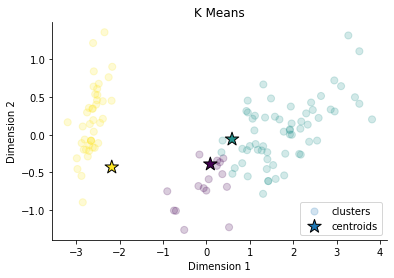

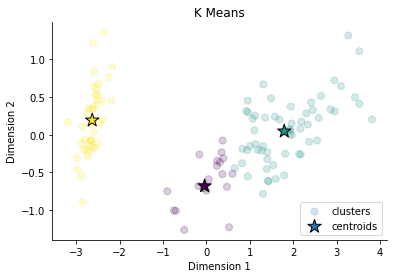

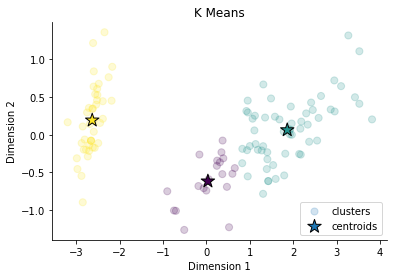

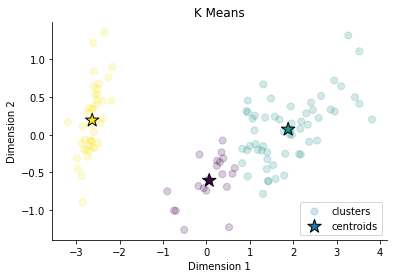

accuracy: 0.4916666666666667


In [ ]:
df['label']=kmeans(x,df,show_acc=True,
                   show_viz=True,fixed_pos=False,
                   genr_gif=True)

In [ ]:
skl_kmeans(x,df)

accuracy: 0.8833333333333333


---

##__4) Hidden Markov Models__


__Hidden Markov model (HMM)__ = a statistical model in which __the system being modeled__ is assumed to be a Markov process — __with unobservable ("hidden") states__. 

- As part of the definition, HMM requires that __there be an observable process whose outcomes are "influenced" by the outcomes of in a known way.__



__Hidden Markov Model = a finite set of states, each of which is associated with a (generally multidimensional) probability distribution__. 
- Transitions among the states are governed by a set of probabilities called transition probabilities." (http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html)

- __A hidden markov model works with probabilities to predict future events or states.__ 






In this section we will learn how to create a hidden markov model that can predict the weather.

*This section is based on the following TensorFlow tutorial.* https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

###__Data__
Let's start by discussing the type of data we use when we work with a hidden markov model. 

In the previous sections we worked with large datasets of 100's of different entries. For a markov model we are only interested in probability distributions that have to do with states. 

We can find these probabilities from large datasets or may already have these values. We'll run through an example in a second that should clear some things up, but let's discuss the components of a markov model.

**States:** In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model, which means we do not direcly observe them.

**Observations:** Each state has a particular outcome or observation associated with it based on a probability distribution. An example of this is the following: *On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.*

**Transitions:** Each state will have a probability defining the likelyhood of transitioning to a different state. An example is the following: *a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.*



To create a hidden markov model we need.
- States
- Observation Distribution
- Transition Distribution

For our purpose we will assume we already have this information available as we attempt to predict the weather on a given day.

In [ ]:
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow as tf
import numpy as np


We will model a simple weather system and try to predict the temperature on each day given the following information.
1. Cold days are encoded by a 0 and hot days are encoded by a 1.

2. The first day in our sequence has an 80% chance of being cold.

3. A cold day has a 30% chance of being followed by a hot day.

4. A hot day has a 20% chance of being followed by a cold day.

5. On each day the temperature is
 normally distributed with mean and standard deviation 0 and 5 on
 a cold day and mean and standard deviation 15 and 10 on a hot day.


__Standard deviation__ gives us the range of values above or below the mean

In [ ]:
#Here we create probability of distribution model
tfd = tfp.distributions  # making a shortcut for later on
#bracket probability representation - [Cold Day, Hot Day]
initial_distribution = tfd.Categorical(probs=[0.8, 0.2])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # insert standard deviation. Refer to point 5 above
#loc=[mean] scale=[standard deviation]
# the loc argument represents the mean and the scale is the standard devitation

In [ ]:
#Here we use hidden Markov model
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.

To get the expected temperatures on each day we can do the following.

In [ ]:
mean = model.mean() #Partially defined tensor - This calculates the probablity so that we can run our probability distribution model

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:  
  print(mean.numpy())

[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]


The model and session combines gives the temperature on 7 days (the reason we input a 7 in the steps portion of the model

Note: temperature is in celsius

- Day 1: 2.9999998 | 
- Day 2: 5.9999995 | 
- Day 3: 7.4999995 | 
- Day 4: 8.25 | 
- Day 5: 8.625001 | 
- Day 6: 8.812501 | 
- Day 7: 8.90625 